<a href="https://colab.research.google.com/github/zrghassabi/DeepLearning/blob/main/Fixed_Feature_Extractor%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning - Fixed Feature Extractor


## Creating and using a Fixed Feature Extractor


In [2]:
# Setting seeds to try and ensure we have the same results - this is not guaranteed across PyTorch releases.
import torch
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [5]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
    ])

trainset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=True, download=True,transform=transform)
testset = datasets.CIFAR10(root='~/.pytorch/CIFAR10',train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [00:01<00:00, 104625394.04it/s]


Extracting /root/.pytorch/CIFAR10/cifar-10-python.tar.gz to /root/.pytorch/CIFAR10


In [6]:
model=models.vgg16(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 196MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [8]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

freeze parameters

In [9]:
for param in model.features.parameters():
  param.requires_grad = False

change last layer

In [10]:
model.classifier[-1]=nn.Sequential(nn.Linear(in_features=4096,out_features=10),nn.LogSoftmax(dim=1))
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=10, bias=True)
    (1): LogSoftmax(dim=1)
  )
)

In [11]:
criterion=nn.NLLLoss()

## Training the Fixed Feature Extractor

In [12]:
from torch.optim import Adam

model = model.to(device)
optimizer = Adam(model.parameters())

In [13]:
num_epochs = 1
batch_loss = 0
cum_epoch_loss = 0

for e in range(num_epochs):
  cum_epoch_loss = 0

  for batch, (images, labels) in enumerate(trainloader,1):
    images = images.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer.step()

    batch_loss += loss.item()
    print(f'Epoch({e}/{num_epochs} : Batch number({batch}/{len(trainloader)})  Batch loss : {loss.item()}')

  print(f'Training loss : {batch_loss/len(trainloader)}')


Epoch(0/1 : Batch number(1/782)  Batch loss : 2.416726589202881
Epoch(0/1 : Batch number(2/782)  Batch loss : 1.9146466255187988
Epoch(0/1 : Batch number(3/782)  Batch loss : 1.6309287548065186
Epoch(0/1 : Batch number(4/782)  Batch loss : 2.5549821853637695
Epoch(0/1 : Batch number(5/782)  Batch loss : 1.7414783239364624
Epoch(0/1 : Batch number(6/782)  Batch loss : 1.5506576299667358
Epoch(0/1 : Batch number(7/782)  Batch loss : 1.661237359046936
Epoch(0/1 : Batch number(8/782)  Batch loss : 1.161007046699524
Epoch(0/1 : Batch number(9/782)  Batch loss : 1.3169951438903809
Epoch(0/1 : Batch number(10/782)  Batch loss : 1.495358943939209
Epoch(0/1 : Batch number(11/782)  Batch loss : 1.174986720085144
Epoch(0/1 : Batch number(12/782)  Batch loss : 1.504691243171692
Epoch(0/1 : Batch number(13/782)  Batch loss : 1.349015235900879
Epoch(0/1 : Batch number(14/782)  Batch loss : 0.9089624881744385
Epoch(0/1 : Batch number(15/782)  Batch loss : 1.1165879964828491
Epoch(0/1 : Batch number(1

KeyboardInterrupt: 

## Evaluating thet network and viewing images

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [15]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


model.to('cpu')

model.eval()

with torch.no_grad():
  images, labels = next(iter(testloader))
  logps = model(images)

  output = torch.exp(logps)
  print(output)


tensor([[2.0302e-02, 2.8332e-02, 2.1244e-02, 4.5445e-01, 5.1422e-03, 3.3834e-01,
         8.9335e-03, 7.9207e-03, 2.4331e-02, 9.0996e-02],
        [4.3649e-04, 1.8264e-04, 1.1470e-07, 2.2625e-07, 6.1747e-09, 1.4405e-08,
         8.1212e-09, 1.7859e-08, 9.9796e-01, 1.4223e-03],
        [9.3136e-03, 4.5303e-01, 4.6017e-06, 1.4404e-05, 1.8986e-07, 4.6824e-06,
         4.0160e-07, 1.9344e-06, 4.8420e-01, 5.3435e-02],
        [7.9472e-01, 1.7153e-03, 3.1341e-02, 2.7083e-02, 1.2085e-03, 1.6076e-03,
         6.9302e-04, 3.6992e-04, 1.3601e-01, 5.2534e-03],
        [2.3051e-09, 1.1974e-08, 3.5523e-05, 1.0419e-06, 3.8976e-07, 1.5665e-08,
         9.9996e-01, 3.3338e-10, 9.9657e-09, 1.3454e-08],
        [6.2421e-04, 3.1748e-03, 8.9192e-03, 2.8444e-01, 1.1747e-01, 2.4405e-01,
         3.3382e-01, 1.8043e-03, 5.1209e-04, 5.1874e-03],
        [1.9557e-06, 8.1275e-01, 9.2716e-09, 2.6582e-07, 2.1528e-09, 1.3978e-06,
         8.5512e-09, 2.3949e-08, 7.6915e-06, 1.8724e-01],
        [5.4764e-02, 1.1246

In [16]:
CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


model.to('cpu')

model.eval()

with torch.no_grad():
  images, labels = next(iter(testloader))
  logps = model(images)

  output = torch.exp(logps)

  pred = torch.argmax(output,1)

model.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

ship


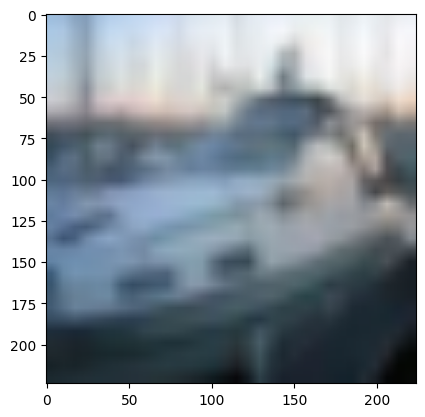

In [17]:
test_image_id=2

def denormalize(tensor):
  tensor = tensor*std+ mean
  return tensor

def show_img(img):
  img = img.numpy().transpose((1,2,0))
  img = denormalize(img)
  img = np.clip(img,0,1)
  plt.imshow(img)

def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return CIFAR10_classes[id]

show_img(images[test_image_id])
print(get_CIFAR10_class(pred[test_image_id]))

In [27]:
test_image_id=2
print(get_CIFAR10_class(pred[test_image_id]))

plane


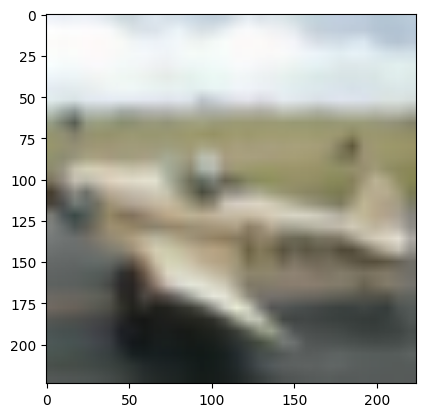

In [28]:
show_img(images[test_image_id])

In [25]:
test_image_id=3
print(get_CIFAR10_class(pred[test_image_id]))

truck


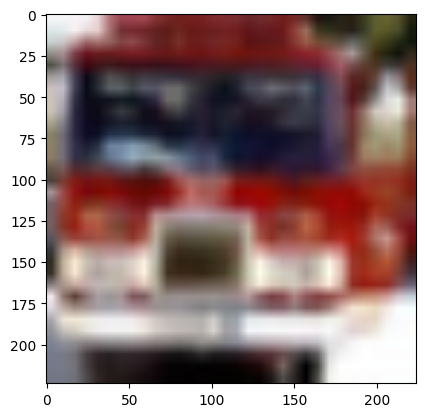

In [26]:
show_img(images[test_image_id])

## Viewing images & normalization - Under the hood

In [21]:
pred


tensor([3, 0, 0, 9, 8, 9, 5, 3, 0, 8, 2, 4, 7, 2, 2, 3, 6, 5, 8, 3, 0, 4, 4, 4,
        9, 0, 6, 1, 0, 9, 1, 8, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 2, 6, 6, 6, 5, 2,
        2, 1, 9, 2, 9, 2, 8, 6, 0, 0, 4, 0, 4, 7, 4, 5])

In [22]:
images.size()


torch.Size([64, 3, 224, 224])

In [29]:
images[0].size()


torch.Size([3, 224, 224])

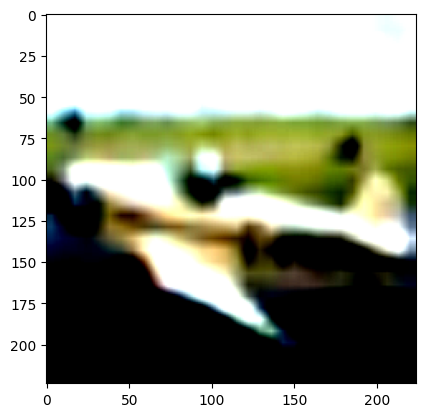

In [33]:
plt.imshow(np.clip(np.transpose(images[test_image_id],(1,2,0)),0,1))

In [35]:
def denormalize(tensor):
  tensor=tensor*std+mean
  return tensor

In [36]:
def show_img(img):
  img=img.numpy().transpose((1,2,0))
  img=denormalize(img)
  img=np.clip(img,0,1)
  plt.imshow(img)

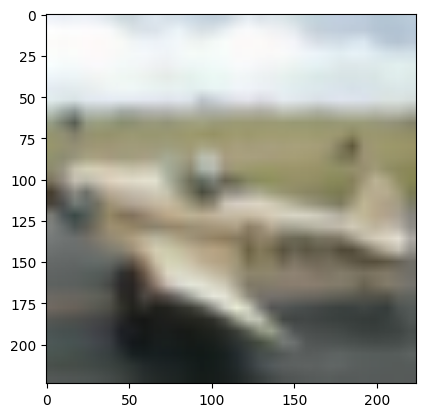

In [38]:
show_img(images[test_image_id])

In [39]:
def get_CIFAR10_class(id):
  CIFAR10_classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  return CIFAR10_classes[id]


In [40]:
get_CIFAR10_class(pred[test_image_id])

'plane'

## Accuracy of the model

In [42]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0
    #set_trace()
    for images, labels in testloader:

        logps = model(images)
        output = torch.exp(logps)
        print(output)
        cnt+=1

        if cnt > 0:
          break

tensor([[2.0302e-02, 2.8332e-02, 2.1244e-02, 4.5445e-01, 5.1422e-03, 3.3834e-01,
         8.9335e-03, 7.9207e-03, 2.4331e-02, 9.0996e-02],
        [4.3649e-04, 1.8264e-04, 1.1470e-07, 2.2625e-07, 6.1747e-09, 1.4405e-08,
         8.1212e-09, 1.7859e-08, 9.9796e-01, 1.4223e-03],
        [9.3136e-03, 4.5303e-01, 4.6017e-06, 1.4404e-05, 1.8986e-07, 4.6824e-06,
         4.0160e-07, 1.9344e-06, 4.8420e-01, 5.3435e-02],
        [7.9472e-01, 1.7153e-03, 3.1341e-02, 2.7083e-02, 1.2085e-03, 1.6076e-03,
         6.9302e-04, 3.6992e-04, 1.3601e-01, 5.2534e-03],
        [2.3051e-09, 1.1974e-08, 3.5523e-05, 1.0419e-06, 3.8976e-07, 1.5665e-08,
         9.9996e-01, 3.3338e-10, 9.9657e-09, 1.3454e-08],
        [6.2421e-04, 3.1748e-03, 8.9192e-03, 2.8444e-01, 1.1747e-01, 2.4405e-01,
         3.3382e-01, 1.8043e-03, 5.1209e-04, 5.1874e-03],
        [1.9557e-06, 8.1275e-01, 9.2716e-09, 2.6582e-07, 2.1528e-09, 1.3978e-06,
         8.5512e-09, 2.3949e-08, 7.6915e-06, 1.8724e-01],
        [5.4764e-02, 1.1246

In [44]:
pred,labels

(tensor([3, 0, 0, 9, 8, 9, 5, 3, 0, 8, 2, 4, 7, 2, 2, 3, 6, 5, 8, 3, 0, 4, 4, 4,
         9, 0, 6, 1, 0, 9, 1, 8, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 2, 6, 6, 6, 5, 2,
         2, 1, 9, 2, 9, 2, 8, 6, 0, 0, 4, 0, 4, 7, 4, 5]),
 tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
         5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
         7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3]))

In [46]:
pred==labels

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True])

In [47]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0

    cnt = 0

    for images, labels in testloader:

        logps = model(images)
        output = torch.exp(logps)

        pred = torch.argmax(output, 1)
        total += labels.size(0)

        cnt+=1

        if cnt > 0:
          break

In [49]:
pred==labels

tensor([ True,  True,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True, False,  True,  True,  True, False,  True, False,
         True, False,  True, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True, False,  True, False,  True,
        False,  True, False, False,  True,  True, False,  True,  True,  True,
        False,  True, False,  True])

In [50]:
images.size()

torch.Size([64, 3, 224, 224])

In [48]:
model.eval()
with torch.no_grad():
    num_correct = 0
    total = 0


    for batch, (images, labels) in enumerate(testloader,1):

        logps = model(images)
        output = torch.exp(logps)

        pred = torch.argmax(output, 1)
        total += labels.size(0)
        num_correct += (pred == labels).sum().item()
        print(f'Batch ({batch}/{len(testloader)})')

        if batch == 5:
          break

    print(f'Accuracy of the model on {total} test images: {num_correct * 100 / total}% ')

Batch (1/157)
Batch (2/157)
Batch (3/157)
Batch (4/157)
Batch (5/157)
Accuracy of the model on 320 test images: 75.9375% 


In [51]:
pred==labels

tensor([ True,  True,  True,  True,  True, False,  True, False,  True,  True,
         True,  True,  True, False,  True,  True,  True, False,  True, False,
         True, False,  True, False,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True, False,  True, False,  True,
        False,  True, False, False,  True,  True, False,  True,  True,  True,
        False,  True, False,  True])